### Graph Convolutional Network on Tox21 

**Setting Up the Environment**

In [0]:
%%capture
%tensorflow_version 1.x
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np 
import tensorflow as tf
import deepchem as dc
from deepchem.models.graph_models import GraphConvModel

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



**Loading the Tox21 Dataset**

In [0]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21(featurizer='GraphConv', reload=False)
train_dataset, valid_dataset, test_dataset = tox21_datasets

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/tox21.csv.gz
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
TIMING: featurizing shard 0 took 22.727 s
TIMING: dataset construction took 25.428 s
Loading dataset from disk.
TIMING: dataset construction took 2.916 s
Loading dataset from disk.
TIMING: dataset construction took 1.226 s
Loading dataset from disk.
TIMING: dataset construction took 1.490 s
Loading dataset from disk.
TIMING: dataset construction took 2.678 s
Loading dataset from disk.
TIMING: dataset construction took 0.289 s
Loading dataset from disk.
TIMING: dataset construction took 0.291 s
Loading dataset from disk.


In [0]:
n_tasks = len(tox21_tasks)
model = GraphConvModel(n_tasks, batch_size=50, mode='classification')

num_epochs = 50
losses = []
for i in range(num_epochs):
 loss = model.fit(train_dataset, nb_epoch=1)
 print("Epoch %d loss: %f" % (i, loss))
 losses.append(loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


KeyboardInterrupt: ignored

**Training the model**

In [0]:
model = GraphConvModel(
    len(tox21_tasks), batch_size=50, mode='classification')
epochs = 20
losses=[]
val_losses = []
for i in range(epochs): 
  loss = model.fit(train_dataset, nb_epoch=3)
  print("Epoch %d loss: %f" % (i, loss))
  val_loss = model.fit(valid_dataset,checkpoint_interval=0)
  losses.append(loss)
  val_losses.append(val_loss)
  model.restore()










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 0 loss: 0.176314
Epoch 1 loss: 0.147185
Epoch 2 loss: 0.154264
Epoch 3 loss: 0.142109
Epoch 4 loss: 0.120959
Epoch 5 loss: 0.125117
Epoch 6 loss: 0.094353
Epoch 7 loss: 0.114832
Epoch 8 loss: 0.107279
Epoch 9 loss: 0.095961
Epoch 10 loss: 0.091641
Epoch 11 loss: 0.086668
Epoch 12 loss: 0.078141
Epoch 13 loss: 0.077718
Epoch 14 loss: 0.060679
Epoch 15 loss: 0.070262
Epoch 16 loss: 0.064375
Epoch 17 loss: 0.063439
Epoch 18 loss: 0.060468
Epoch 19 loss: 0.000000
Epoch 20 loss: 0.050272
Epoch 21 loss: 0.048155
Epoch 22 loss: 0.051451
Epoch 23 loss: 0.042479
Epoch 24 loss: 0.039164
Epoch 25 loss: 0.040520
Epoch 26 loss: 0.035789
Epoch 27 loss: 0.029507
Epoch 28 loss: 0.032923
Epoch 29 loss: 0.031473


**Evaluating the model**

In [0]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %5.2f" % train_scores["mean-roc_auc_score"])
valid_scores = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %5.2f" % valid_scores["mean-roc_auc_score"])
test_scores = model.evaluate(test_dataset, [metric], transformers)
print("Testing ROC-AUC Score: %5.2f" % test_scores["mean-roc_auc_score"])

Evaluating model
computed_metrics: [0.9915755851934933, 0.9980195287411688, 0.9951378795991739, 0.9943116773659657, 0.9865616838621261, 0.994579060330185, 0.9978816525196725, 0.9917524875934154, 0.9977561280736065, 0.9894228267092275, 0.9963976235575354, 0.9990160541477877]
Training ROC-AUC Score:  0.99
computed_metrics: [0.8028001781032009, 0.8975694444444444, 0.8640376826104765, 0.8067329689883072, 0.6661363636363637, 0.7280996774447328, 0.780373831775701, 0.8270743793889006, 0.8027784318342359, 0.828467727436174, 0.8898656255239648, 0.8212209302325582]
Validation ROC-AUC Score:  0.81
computed_metrics: [0.7980446412101088, 0.9115382453773956, 0.8839695063439599, 0.8503768055264811, 0.7238229591058629, 0.8326326326326325, 0.8608076795762991, 0.7680929949513162, 0.8908532029074112, 0.7741018457481872, 0.9183052045227802, 0.8700572801182558]
Testing ROC-AUC Score:  0.84


**Visualizing Training and Validation losses against each Epoch**

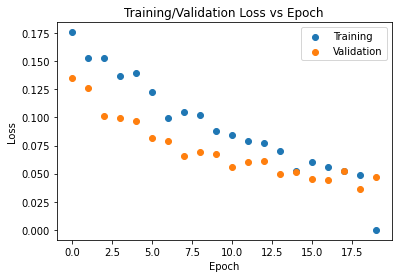

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training/Validation Loss vs Epoch")
plt.scatter(range(epochs),losses)
plt.scatter(range(epochs),val_losses)
plt.legend(['Training', 'Validation'])
plt.show()


### Implementing Graph Convolutional network on Tox21 from scratch

**Creating a TensorGraph that holds the computation graph that defines the computation that a Graph convolutional network perform**

In [0]:
# Creating a TensorGraph that holds the computation graph that defines the 
# computation that a Graph convolutional network perform
from deepchem.models import TensorGraph
tg = TensorGraph(use_queue=False)

**Defining the inputs to the model**

In [0]:
#Feature layer defines the input to the TensorGraph model
from deepchem.models.tensorgraph.layers import Feature  

#each atom is a vector of length 75
atom_features = Feature(shape=(None, 75))
#indexing convenience that makes it easy to locate atoms from all molecules with a given degree       
degree_slice = Feature(shape=(None, 2), dtype=tf.int32)
#membership of an atom to a molecule     
membership = Feature(shape=(None,), dtype=tf.int32)     

#degree adjacency list: list that contains adjacency lists grouped by atom degree
deg_adjs = []       
for i in range(0, 10 + 1):
    deg_adj = Feature(shape=(None, i + 1), dtype=tf.int32)
    deg_adjs.append(deg_adj)

**Implementing the body of the Graph Convolutional Network**

In [0]:
from deepchem.models.tensorgraph.layers import Dense, GraphConv, BatchNorm
from deepchem.models.tensorgraph.layers import GraphPool, GraphGather

batch_size = 50

gc1 = GraphConv(64,activation_fn=tf.nn.relu,in_layers
                =[atom_features, degree_slice, membership] + deg_adjs)
batch_norm1 = BatchNorm(in_layers=[gc1])
gp1 = GraphPool(in_layers=[batch_norm1, degree_slice, membership] + deg_adjs)
gc2 = GraphConv(64,activation_fn=tf.nn.relu,in_layers
                =[gp1, degree_slice, membership] + deg_adjs)
batch_norm2 = BatchNorm(in_layers=[gc2])
gp2 = GraphPool(in_layers=[batch_norm2, degree_slice, membership] + deg_adjs)
dense = Dense(out_channels=128, activation_fn=tf.nn.relu, in_layers=[gp2])
batch_norm3 = BatchNorm(in_layers=[dense])
readout = GraphGather(batch_size=batch_size,activation_fn=tf.nn.tanh,in_layers
                      =[batch_norm3, degree_slice, membership] + deg_adjs)

**Predictions on TensorGraph model from Tox21 dataset**

In [0]:
from deepchem.models.tensorgraph.layers import Dense, SoftMax,SoftMaxCrossEntropy, WeightedError, Stack
from deepchem.models.tensorgraph.layers import Label, Weights

costs = []
labels = []

for task in range(len(tox21_tasks)):
    classification = Dense(out_channels=2, activation_fn=None, in_layers=[readout])

    softmax = SoftMax(in_layers=[classification])
    tg.add_output(softmax)

    label = Label(shape=(None, 2))
    labels.append(label)
    cost = SoftMaxCrossEntropy(in_layers=[label, classification])
    costs.append(cost)

all_cost = Stack(in_layers=costs, axis=1)
weights = Weights(shape=(None, len(tox21_tasks)))



loss = WeightedError(in_layers=[all_cost, weights])
tg.set_loss(loss)

**Training the model**

In [0]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

def data_generator(dataset, epochs=1, predict=False, pad_batches=True):
  for epoch in range(epochs):
       
    for ind, (X_b, y_b, w_b, ids_b) in enumerate(
        dataset.iterbatches(
            batch_size, pad_batches=pad_batches, deterministic=True)):
      d = {}
      for index, label in enumerate(labels):
        d[label] = to_one_hot(y_b[:, index])
      d[weights] = w_b
      multiConvMol = ConvMol.agglomerate_mols(X_b)
      d[atom_features] = multiConvMol.get_atom_features()
      d[degree_slice] = multiConvMol.deg_slice
      d[membership] = multiConvMol.membership
      for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
        d[deg_adjs[i - 1]] = multiConvMol.get_deg_adjacency_lists()[i]
      yield d

In [0]:
losses = []
val_losses = []
num_epochs = 50
for i in range(num_epochs):
  loss = tg.fit_generator(data_generator(train_dataset, epochs=1))
  val_loss = tg.fit_generator(data_generator(valid_dataset))
  print("Epoch %d loss: %f" % (i, loss))
  losses.append(loss)
  val_losses.append(val_loss)

Epoch 0 loss: 44.452468
Epoch 1 loss: 45.446474
Epoch 2 loss: 44.672657
Epoch 3 loss: 43.310571
Epoch 4 loss: 41.752651
Epoch 5 loss: 40.744858
Epoch 6 loss: 40.322101
Epoch 7 loss: 38.982080
Epoch 8 loss: 38.270448
Epoch 9 loss: 37.720107
Epoch 10 loss: 37.331560
Epoch 11 loss: 36.587305
Epoch 12 loss: 36.535493
Epoch 13 loss: 36.599329
Epoch 14 loss: 35.375841
Epoch 15 loss: 35.439965
Epoch 16 loss: 35.086403
Epoch 17 loss: 34.954152
Epoch 18 loss: 34.002185
Epoch 19 loss: 34.296533
Epoch 20 loss: 33.472938
Epoch 21 loss: 34.008184
Epoch 22 loss: 33.134326
Epoch 23 loss: 33.711821
Epoch 24 loss: 32.483924
Epoch 25 loss: 32.885912
Epoch 26 loss: 32.474903
Epoch 27 loss: 32.110731
Epoch 28 loss: 32.111338
Epoch 29 loss: 30.551515
Epoch 30 loss: 30.145219
Epoch 31 loss: 28.893479
Epoch 32 loss: 29.063519
Epoch 33 loss: 28.814119
Epoch 34 loss: 28.385717
Epoch 35 loss: 29.515639
Epoch 36 loss: 27.908579
Epoch 37 loss: 26.669194
Epoch 38 loss: 27.166081
Epoch 39 loss: 26.482262
Epoch 40 l

**Evaluating the model performance**

In [0]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean, mode="classification")

def reshape_y_pred(y_true, y_pred):
    """
    TensorGraph.Predict returns a list of arrays, one for each output
    We also have to remove the padding on the last batch
    Metrics taks results of shape (samples, n_task, prob_of_class)
    """
    n_samples = len(y_true)
    retval = np.stack(y_pred, axis=1)
    return retval[:n_samples]


print("Evaluating model")
train_predictions = tg.predict_on_generator(data_generator(train_dataset, predict=True))
train_predictions = reshape_y_pred(train_dataset.y, train_predictions)
train_scores = metric.compute_metric(train_dataset.y, train_predictions, train_dataset.w)
print("Training ROC-AUC Score: %f" % train_scores)

valid_predictions = tg.predict_on_generator(data_generator(valid_dataset, predict=True))
valid_predictions = reshape_y_pred(valid_dataset.y, valid_predictions)
valid_scores = metric.compute_metric(valid_dataset.y, valid_predictions, valid_dataset.w)
print("Valid ROC-AUC Score: %f" % valid_scores)

test_predictions = tg.predict_on_generator(data_generator(test_dataset, predict=True))
test_predictions = reshape_y_pred(test_dataset.y, test_predictions)
test_scores = metric.compute_metric(test_dataset.y, test_predictions, test_dataset.w)
print("Testing ROC-AUC Score: %f" % test_scores)

Evaluating model
computed_metrics: [0.9872912260500968, 0.994966783076429, 0.9831283944006732, 0.9774839319398445, 0.9569214956170972, 0.9816271524920226, 0.9919798926928285, 0.9742361477241345, 0.9891258012430142, 0.9806722412088198, 0.9821703293452149, 0.9831862169267775]
Training ROC-AUC Score: 0.981899
computed_metrics: [0.9986642259931726, 0.9977678571428572, 0.9973603968506803, 0.9970767666497204, 0.9916136363636363, 0.9955156950672646, 0.9993942540671512, 0.9920148429977218, 0.9970802919708028, 0.9882348975188782, 0.9979640230903735, 0.9978466838931956]
Valid ROC-AUC Score: 0.995878
computed_metrics: [0.7921047777162885, 0.8719018715225089, 0.8675551764580446, 0.7740867699392925, 0.6744536918015643, 0.7787454120787454, 0.8083622972525653, 0.7574885052289939, 0.7694110454452823, 0.7472087178642056, 0.9069099185234453, 0.8192558203991132]
Testing ROC-AUC Score: 0.797290


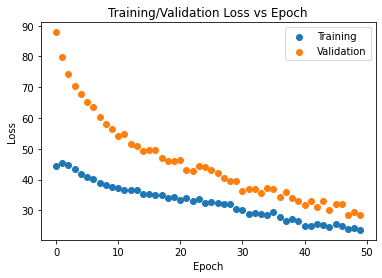

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training/Validation Loss vs Epoch")
plt.scatter(range(num_epochs),losses)
plt.scatter(range(num_epochs),val_losses)
plt.legend(['Training', 'Validation'])
plt.show()